In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *
import warnings
warnings.filterwarnings('ignore')

In [14]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/cph central and nørreport measurements/Station 1/'
path_asphalt = 'L:/PG-Nanoteknologi/PROJEKTER/EPA-asfaltprojekt/On-line PAH Projekt KU/ACSM/txt/mass_spec/'
path_TinaTin = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/TinaTin MS'
ACSM_keys = ['10-12-2024', '11-12-2024', '12-12-2024', '13-12-2024']
MS_keys = ['10-12-2024_full', '11-12-2024_before-peak', '11-12-2024_peak', '11-12-2024_full', '12-12-2024_peak', '12-12-2024_full', '13-12-2024_full']
MS_asphalt_keys = ['Vesterbrogade_12062023_MS_TraficBefore', 'Vesterbrogade_12062023_MS_TraficAfter',
                   'Vesterbrogade_13062023_MS_TraficBefore', 'Vesterbrogade_13062023_MS_TraficAfter']
MS_TinaTin_keys = ['7-3-2022_full', '8-3-2022_full', '9-3-2022_full', '10-3-2022_full', '11-3-2022_full', '12-3-2022_full', '13-3-2022_full', '14-3-2022_full']

ACSM = read_csv(path + 'Timeseries/', parent_path, 't_base', None, 1)
MS = read_txt(path + 'MS/', parent_path, MS_keys, '\t', None)
MS_asphalt = read_txt(path_asphalt, parent_path, MS_asphalt_keys, '\t', None)
MS_TinaTin = read_txt(path_TinaTin, parent_path, MS_TinaTin_keys, '\t', None)

for key in MS.keys():
    MS[key].columns = ['m/z', 'org']

for key in MS_asphalt.keys():
    MS_asphalt[key].columns = ['m/z', 'org']

for key in MS_TinaTin.keys():
    MS_TinaTin[key].columns = ['m/z', 'org']

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x800 with 5 Axes>

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

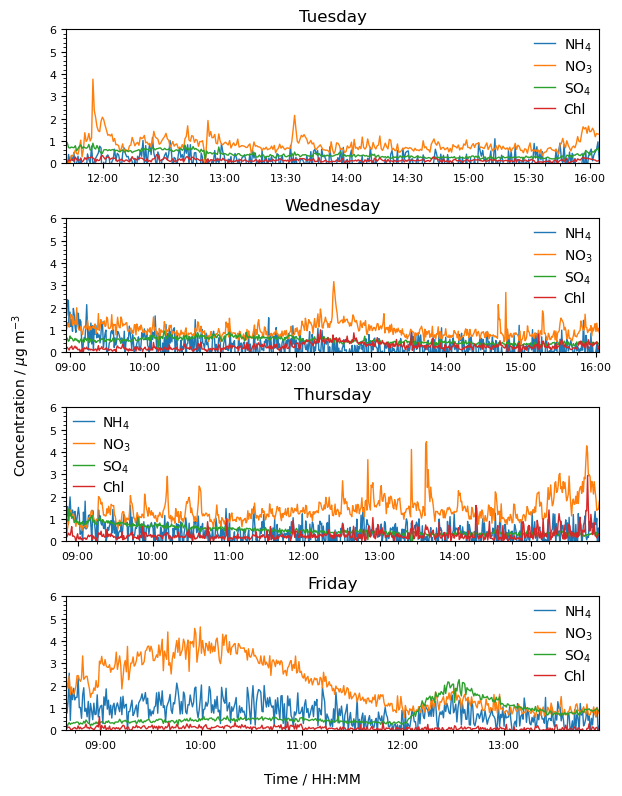

In [ ]:
titles = ['Tuesday', 'Wednesday', 'Thursday', 'Friday']

fig1, axes1 = plt.subplots(4, 1, figsize = (6.3, 8))

plot_Conc(axes1, fig1, ACSM, ACSM_keys, 'Org', 'Concentration / $\mu$g m$^{-3}$')

for ax, ttl in zip(axes1, titles):
    ax.set(ylim = (0, 50), title = ttl)

artist, inset_ax = plot_inset(axes1[2], 0.4, 2, (0.05, 0, 0.99, 1), '40%', ACSM['12-12-2024']['Time'], ACSM['12-12-2024']['Org'], None, False, True, ['2024-12-12 12:45:00', '2024-12-12 13:45:00'])

fig1.tight_layout()
fig1.savefig('ACSM/full_timeseries_org.png', dpi = 600)
plt.show()

fig2, axes2 = plt.subplots(4, 1, figsize = (6.3, 8))

plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'NH4', 'Concentration / $\mu$g m$^{-3}$')
plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'NO3', 'Concentration / $\mu$g m$^{-3}$')
plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'SO4', 'Concentration / $\mu$g m$^{-3}$')
plot_Conc(axes2, fig2, ACSM, ACSM_keys, 'Chl', 'Concentration / $\mu$g m$^{-3}$')

for ax, ttl in zip(axes2, titles):
    ax.legend(labels = ['NH$_{4}$', 'NO$_{3}$', 'SO$_{4}$', 'Chl'])
    ax.set(title = ttl, ylim = (0, 6))

fig2.tight_layout()
fig2.savefig('ACSM/full_timeseries_other.png', dpi = 600)
plt.show()

In [4]:
titles = ['Tuesday', 'Wednesday', 'Thursday', 'Friday']

fig, axes = plt.subplots(4, 1, figsize = (6.3, 8))

plot_MS_wInset(axes, MS, [key for key in MS_keys if 'full' in key], 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], ACSM_keys)

for ax, ttl in zip(axes, titles):
    ax.set(title = ttl)

fig.tight_layout()
fig.savefig('ACSM/full_MS_org.png', dpi = 600)
plt.show()

C:\Users\B363580\AppData\Local\Temp\ipykernel_15468\1904082198.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x800 with 8 Axes>

In [5]:
titles = ['Day 1 traffic before', 'Day 1 traffic after', 'Day 2 traffic before', 'Day 2 traffic after']

fig, ax = plt.subplots(4, 1, figsize = (6.3, 8))

plot_MS_wInset(ax, MS_asphalt, MS_asphalt_keys, 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], titles)

fig.tight_layout()
fig.savefig('ACSM/Trafic_MS_org.png', dpi = 600)
plt.show()

C:\Users\B363580\AppData\Local\Temp\ipykernel_15468\82315549.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x800 with 8 Axes>

In [6]:
fig, axes = plt.subplots(4, 1, figsize = (6.3, 8))

plot_MS_wInset(axes, MS_TinaTin, MS_TinaTin_keys[:4], 'org', 0.5, 1, (0, -0.09, 0.99, 1), [0.4, 0.3], MS_TinaTin_keys[:4])

for i, ax in enumerate(axes):
    date = MS_TinaTin_keys[i].split('_')[0]
    ax.set_title('Train maintenance facility ' + date)

fig.tight_layout()
fig.savefig('ACSM/PrepCenter1_MS_org.png', dpi = 600)
plt.show()

C:\Users\B363580\AppData\Local\Temp\ipykernel_15468\3587433796.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


AttributeError: 'NoneType' object has no attribute '_get_renderer'

<Figure size 630x800 with 8 Axes>